<a href="https://colab.research.google.com/github/uyminhtri2702/AI/blob/main/cifa100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#  Gọi các thư viên cần thiết
import numpy as np
import pandas as pd
from keras.datasets import cifar10 , cifar100
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.backend import dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [39]:
# Chia dữ liệu thành 2 phần:  phần huyến luyện và phần test
(x_train, y_train),(x_test,y_test) = cifar100.load_data()


<function matplotlib.pyplot.show>

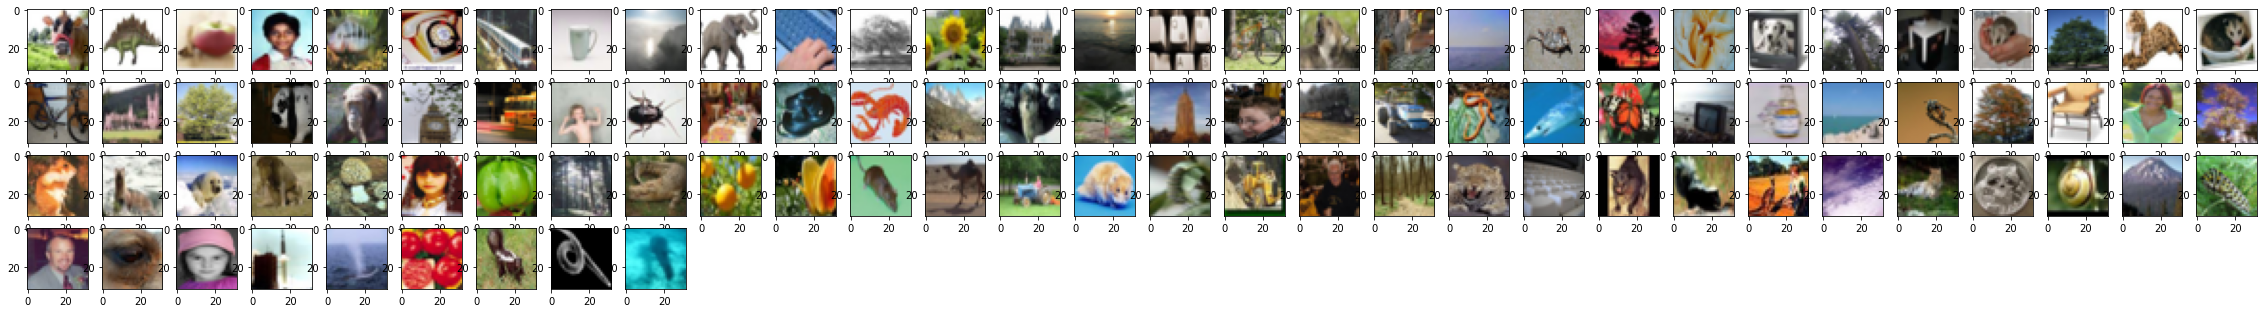

In [40]:
plt.figure(figsize=(40,40))
for i in range(99):
  plt.subplot(30,30,i+1)
  plt.imshow(x_train[i])
plt.show

In [41]:
# Kích thước các tập dữ liệu
x_train.shape , x_test .shape,  y_train.shape,  y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [42]:
#  x_train , x_test  là mảng 4 chiều nên chuyển sang mảng 2 chiều 
x_train = x_train.reshape(50000 , 3072 )  #32*32*3
x_test = x_test.reshape(10000 ,  3072 )   #32*32*3

# Chuẩn hóa dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /= 255

# Chuyển y thành 100 class do output là 100
y_train =np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [44]:
# Tạo mạng neron nhân tạo

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               1573376   
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               131584    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 100)              

In [45]:
# Huấn luyện mô hình 
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128, epochs=500 , verbose=1 , validation_split=0.2 , callbacks=[EarlyStopping(monitor='val_loss',patience=70)])
# verbose=1  hiển thị  thanh tiến trình

Epoch 1/500
313/313 [==============================] - 14s 42ms/step - loss: 4.3724 - accuracy: 0.0385 - val_loss: 4.3336 - val_accuracy: 0.0460
Epoch 2/500
313/313 [==============================] - 13s 40ms/step - loss: 4.0447 - accuracy: 0.0756 - val_loss: 3.8538 - val_accuracy: 0.1126
Epoch 3/500
313/313 [==============================] - 13s 42ms/step - loss: 3.8947 - accuracy: 0.0980 - val_loss: 3.8143 - val_accuracy: 0.1215
Epoch 4/500
313/313 [==============================] - 12s 40ms/step - loss: 3.8103 - accuracy: 0.1138 - val_loss: 3.7007 - val_accuracy: 0.1350
Epoch 5/500
313/313 [==============================] - 12s 39ms/step - loss: 3.7486 - accuracy: 0.1236 - val_loss: 3.6715 - val_accuracy: 0.1487
Epoch 6/500
313/313 [==============================] - 13s 43ms/step - loss: 3.7001 - accuracy: 0.1320 - val_loss: 3.7308 - val_accuracy: 0.1308
Epoch 7/500
313/313 [==============================] - 13s 41ms/step - loss: 3.6602 - accuracy: 0.1379 - val_loss: 3.6033 - val_ac

In [47]:

# Lưu kết quả của model
from tensorflow.keras.models import load_model
model.save('triCifar100.h5')
load_model('triCifar100.h5')

In [48]:
# Đánh giá độ chính xác của mô hình
score = model.evaluate(x_test,y_test,verbose=0)
print('erro test is: ',score[0])
print('The test accuracy is: ',score[1])

erro test is:  3.4812912940979004
The test accuracy is:  0.18240000307559967


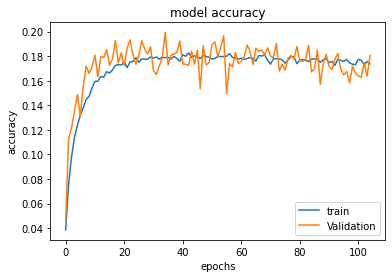

In [49]:
# Vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [50]:
# Kiểm tra kết quả của mô hình
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
filename = 'cat.jpg'
img = load_img(filename, target_size =(32,32))
img.show(filename)
img = img_to_array(img)
img = img.astype('float32')
img = img/255
img=img.reshape(1,32*32*3)
np.argmax (model.predict(img) , axis =-1)

array([94])